<a href="https://colab.research.google.com/github/HernanMagallanes/TensorFlow_course/blob/main/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Core Learning Algorithms

## Linear regresion  

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.



In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
# training data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 

# testing data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') 

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [ ]:
dftrain.shape

(627, 9)

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
dftrain.columns

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch',  'class', 'deck',
       'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
for feature in feature_columns:
  print(feature)

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_va

In [ ]:
# input function: the way that we define how our data is going to be "broke"
# into epochs and into batches to feed the model 

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():

    # create tf.data.Dataset object with data and its label
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

    # ramdomize order of data
    if shuffle:
      ds = ds.shuffle(1000)
  
    # split dataset into batches and repeat process for number of epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    # return a batch of the dataset
    return ds
    
  # return a function object for use
  return input_function

In [ ]:
# here we will call the input_function that was returned to us
# to get a dataset object we can feed to the model

# here we will call the input_function that was returned to us to get a dataset object we can feed to the model
train_input_fn = make_input_fn(dftrain, y_train)  
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# model
# We create a linear estimtor by passing the feature columns we created earlier
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# training the model
linear_est.train(train_input_fn)

# get model metrics/stats by testing on tetsing data
result = linear_est.evaluate(eval_input_fn)

clear_output()  
print(result['accuracy'])

In [ ]:
# type(result) 
# dict

for k, v in result.items():
  print(k, v)

accuracy 0.7689394
accuracy_baseline 0.625
auc 0.8360882
auc_precision_recall 0.78571945
average_loss 0.4855882
label/mean 0.375
loss 0.47649506
precision 0.72619045
prediction/mean 0.3180893
recall 0.61616164
global_step 200


In [ ]:
# model prediction
# probabilities: [p_NO_survive , p_survive]

pred = list(linear_est.predict(eval_input_fn))
clear_output()  

pred_0 = pred[0]

for k, v in pred_0.items():
  print(k, v)

logits [-2.919884]
logistic [0.05117935]
probabilities [0.94882065 0.05117933]
class_ids [0]
classes [b'0']
all_class_ids [0 1]
all_classes [b'0' b'1']


In [ ]:
# real features
print(dfeval.loc[0])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object


In [ ]:
# what happens
print(y_eval[0])

0


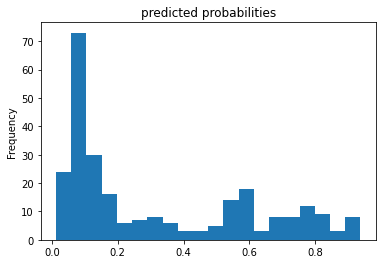

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
clear_output()  

probs.plot(kind='hist', bins=20, title='predicted probabilities')

## Classification

classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica


In [ ]:
# %tensorflow_version 2.x

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

# import numpy as np 
# import matplotlib.pyplot as plt
# from IPython.display import clear_output
# from six.moves import urllib
# import tensorflow.compat.v2.feature_column as fc

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [ ]:
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)


16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
# the species column is now gone
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() 

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape

(120, 4)

In [ ]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [ ]:
# input function

def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

for column in my_feature_columns:
  print(column) 

NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [ ]:
# model
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each
# The model must choose between 3 classes.

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10],
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprxehgbul', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

clear_output()

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

clear_output()

for k, v in eval_result.items():
  print(k, v)

accuracy 0.93333334
average_loss 0.4234185
loss 0.4234185
global_step 5000


In [ ]:
# prediction 

def input_fn_prediction(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predict = {'SepalLength':[5.9], 
           'SepalWidth':[3.0], 
           'PetalLength':[4.2],
           'PetalWidth':[1.5]}

predictions = classifier.predict(input_fn=lambda: input_fn_prediction(predict))

for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    prob = pred_dict['probabilities'][class_id]

clear_output()
print(f'Prediction is "{SPECIES[class_id]}" {(prob*100).round(2)} %)')      

Prediction is "Versicolor" 52.26 %)


## Hidden markov models

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)


In [ ]:
# !pip install tensorflow_probability==0.8.0rc0 --user --upgrade

In [2]:
import tensorflow_probability as tfp
import tensorflow as tf

In [3]:
tfp.__version__

'0.16.0'

In [4]:
tf.__version__

'2.8.0'

# weather model
For a markov model we are only interested in probability distributions that have to do with states. 


**States:** In each markov model we have a finite set of states. These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it based on a probability distribution.

**Transitions:** Each state will have a probability defining the likelyhood of transitioning to a different state.

To create a hidden markov model we need.
- States
- Observation Distribution
- Transition Distribution


In [5]:
# We will model a simple weather system and try to predict the temperature on each day given the following information.

# 1. Cold days are encoded by a 0 and hot days are encoded by a 1.
# 2. The first day in our sequence has an 80% chance of being cold.
# 3. A cold day has a 30% chance of being followed by a hot day.
# 4. A hot day has a 20% chance of being followed by a cold day.
# 5. On each day the temperature is

#  normally distributed with mean and standard deviation 0 and 5 on
#  a cold day and mean and standard deviation 15 and 10 on a hot day.

tfd = tfp.distributions

initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) 

transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])

observation_distribution = tfd.Normal(loc=[0.5, 15.0], scale=[5.0, 10.0])

In [6]:
# hidden markov model

model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7
)

In [7]:
# predict 7 days, an entire week
# get the expected temperatures on each day 

mean = model.mean()

# due to the way TensorFlow works on a lower level
#  we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of TensorFlow we need to use tf.compat.v1.Session() 
# rather than just tf.Session()

with tf.compat.v1.Session() as sess:
  print(mean.numpy().round(2))

[3.4  6.3  7.75 8.48 8.84 9.02 9.11]
